## Import useful stuff

In [2]:
from __future__ import print_function, division
import requests
import re
import pandas as pd
import dateutil.parser
import datetime
import pickle
import patsy
import numpy as np
from pprint import pprint
from bs4 import BeautifulSoup
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from seaborn import plt
%matplotlib inline

# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold

/Users/maxkneissl/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Unpickle movies_total_df
with open('movies_total_adj_df.pkl', 'rb') as picklefile: 
    movies_total_df = pickle.load(picklefile)

## Modelling multivariate regression with statsmodels

In [5]:
y3, X3 = patsy.dmatrices('log_dtg ~ log_widest_release + no_countries + log_days_in_release + log_runtime_mins', data=movies_total_df, return_type="dataframe")
model3 = sm.OLS(y3, X3)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_dtg   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2538.
Date:                Tue, 24 Jan 2017   Prob (F-statistic):               0.00
Time:                        14:20:00   Log-Likelihood:                -958.93
No. Observations:                 778   AIC:                             1928.
Df Residuals:                     773   BIC:                             1951.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -1.3550      0.898     -1.508      0.132        -3.119     0.409
log_widest_release      1.0097      0.018     56.968      0.000         0.975     1.044
no_countries            0.0092      0.002      4.125      0.000         0.005     0.014
log_days_in_release     0.7145      0.037     19.073      0.000         0.641     0.788
log_runtime_mins        1.5630      0.187      8.339      0.000         1.195     1.931
==============================================================================
Omnibus:                       44.441   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.023
Skew:                           0.145   Prob(JB):                     1.96e-32
Kurtosis:                       5.103   Cond. No.                         878.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelling univariate regression models for 2-dimensional plots

In [40]:
y, X = patsy.dmatrices('log_dtg ~ log_widest_release', data=movies_total_df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_dtg   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     6080.
Date:                Tue, 24 Jan 2017   Prob (F-statistic):               0.00
Time:                        15:22:06   Log-Likelihood:                -1141.7
No. Observations:                 778   AIC:                             2287.
Df Residuals:                     776   BIC:                             2297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              8.1415      0.083     98.526      0.000         7.979     8.304
log_widest_release     1.1656      0.015     77.975      0.000         1.136     1.195
==============================================================================
Omnibus:                       36.779   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.765
Skew:                          -0.272   Prob(JB):                     7.88e-18
Kurtosis:                       4.461   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y, X = patsy.dmatrices('log_dtg ~ no_countries', data=movies_total_df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_dtg   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     972.6
Date:                Tue, 24 Jan 2017   Prob (F-statistic):          4.84e-139
Time:                        15:22:54   Log-Likelihood:                -1673.2
No. Observations:                 778   AIC:                             3350.
Df Residuals:                     776   BIC:                             3360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       11.6716      0.103    113.564      0.000        11.470    11.873
no_countries     0.1153      0.004     31.187      0.000         0.108     0.123
==============================================================================
Omnibus:                        2.447   Durbin-Watson:                   1.034
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                2.277
Skew:                          -0.116   Prob(JB):                        0.320
Kurtosis:                       3.129   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
y, X = patsy.dmatrices('log_dtg ~ log_days_in_release', data=movies_total_df, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_dtg   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     282.9
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           2.32e-54
Time:                        15:23:05   Log-Likelihood:                -1868.3
No. Observations:                 778   AIC:                             3741.
Df Residuals:                     776   BIC:                             3750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               6.7583      0.434     15.576      0.000         5.907     7.610
log_days_in_release     1.8342      0.109     16.820      0.000         1.620     2.048
==============================================================================
Omnibus:                       61.667   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.258
Skew:                          -0.251   Prob(JB):                     1.21e-06
Kurtosis:                       2.232   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plotting univariate regression functions

In [43]:
# define function for log_widest_release
def lwr(x):
    return 8.1415 + 1.1656 * x

# define function for no_countries
def nco(x):
    return 11.6716 + 0.1153 * x

# define function for log_days_in_release
def ldr(x):
    return 6.7583 + 1.8342 * x

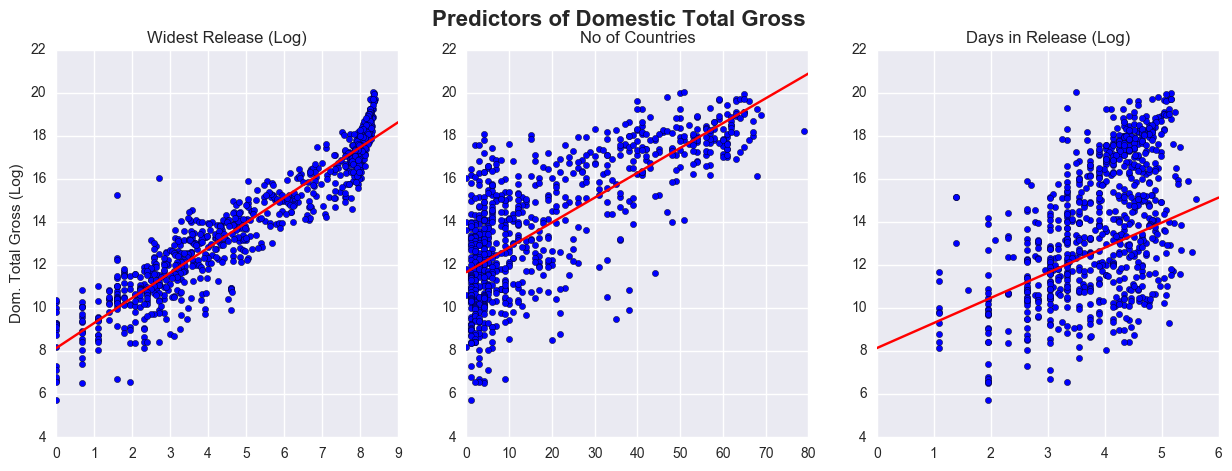

In [146]:
fig = plt.figure(num=1, figsize=(8,6))
fig.set_size_inches(15, 5, forward=False)
fig.suptitle('Predictors of Domestic Total Gross', fontsize=16, fontweight='bold')

# log_widest_release
x_plot = np.linspace(0,9, num = 20)

plt.subplot(131)
plt.scatter(x=movies_total_df["log_widest_release"], y=movies_total_df["log_dtg"], label="log_widest_release")
plt.plot(x_plot, lwr(x_plot), color="red")
plt.title('Widest Release (Log)')
plt.ylabel("Dom. Total Gross (Log)")
plt.xlim(0, 9)
plt.grid(True)

# no_countries
x_plot = np.linspace(0,80, num = 20)

plt.subplot(132)
plt.scatter(x=movies_total_df["no_countries"], y=movies_total_df["log_dtg"], label="no_countries")
plt.plot(x_plot, nco(x_plot), color="red")
plt.title('No of Countries')
plt.xlim(0, 80)
plt.grid(True)

# log_widest_release
x_plot = np.linspace(0,6, num = 20)

plt.subplot(133)
plt.scatter(x=movies_total_df["log_days_in_release"], y=movies_total_df["log_dtg"], label="log_days_in_release")
plt.plot(x_plot, lwr(x_plot), color="red")
plt.title('Days in Release (Log)')
plt.xlim(0, 6)
plt.grid(True)

In [151]:
movies_total_df[movies_total_df["movie_title"] == "Finding Dory"]

,movie_title,domestic_total_gross,release_date,runtime_mins,rating,no_countries,widest_release,days_in_release,log_dtg,log_runtime_mins,log_no_countries,log_widest_release,log_days_in_release
1,Finding Dory,486295561.0,2016-06-17,103.0,PG,50.0,4305.0,175.0,20.002327,4.634729,3.912023,8.367532,5.164786


## Fitting an nth-degree Polynomial

In [ ]:
# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

In [66]:
# Reshaping Series as we only use one feature
X = movies_total_df["log_widest_release"].reshape((778, 1))
Y = movies_total_df["log_dtg"].reshape((778, 1))

In [68]:
Y.shape

(778, 1)

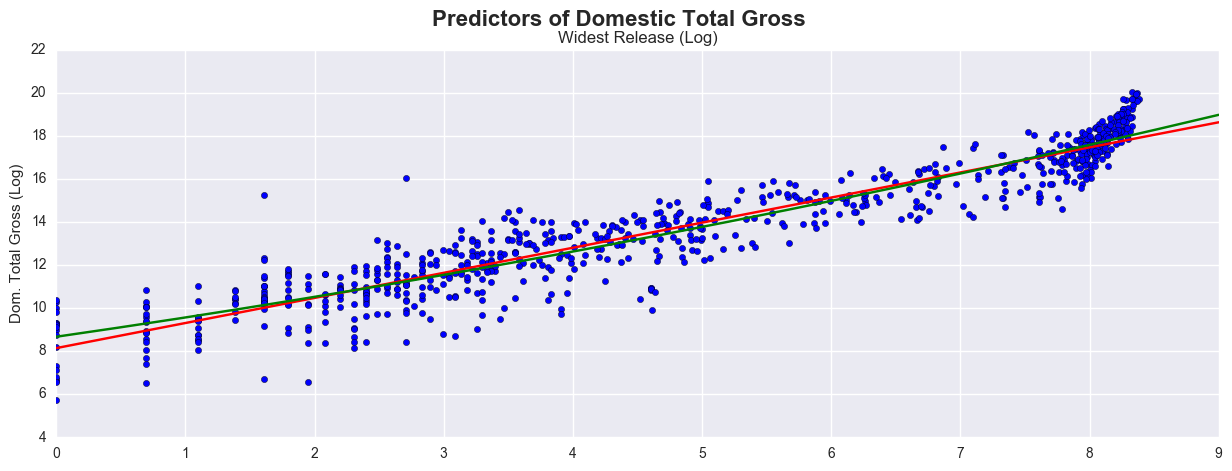

In [72]:
# Set the degree of our polynomial
degree = 2
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, movies_total_df["log_dtg"])

fig = plt.figure(num=1, figsize=(8,6))
fig.set_size_inches(15, 5, forward=False)
fig.suptitle('Predictors of Domestic Total Gross', fontsize=16, fontweight='bold')

# log_widest_release
x_plot = np.linspace(0,9, num = 20)

plt.subplot(111)
plt.scatter(x=X, y=movies_total_df["log_dtg"], label="log_widest_release")
plt.plot(x_plot, lwr(x_plot), color="red")
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='green', label="polynomial")
plt.title('Widest Release (Log)')
plt.ylabel("Dom. Total Gross (Log)")
plt.xlim(0, 9)
plt.grid(True)

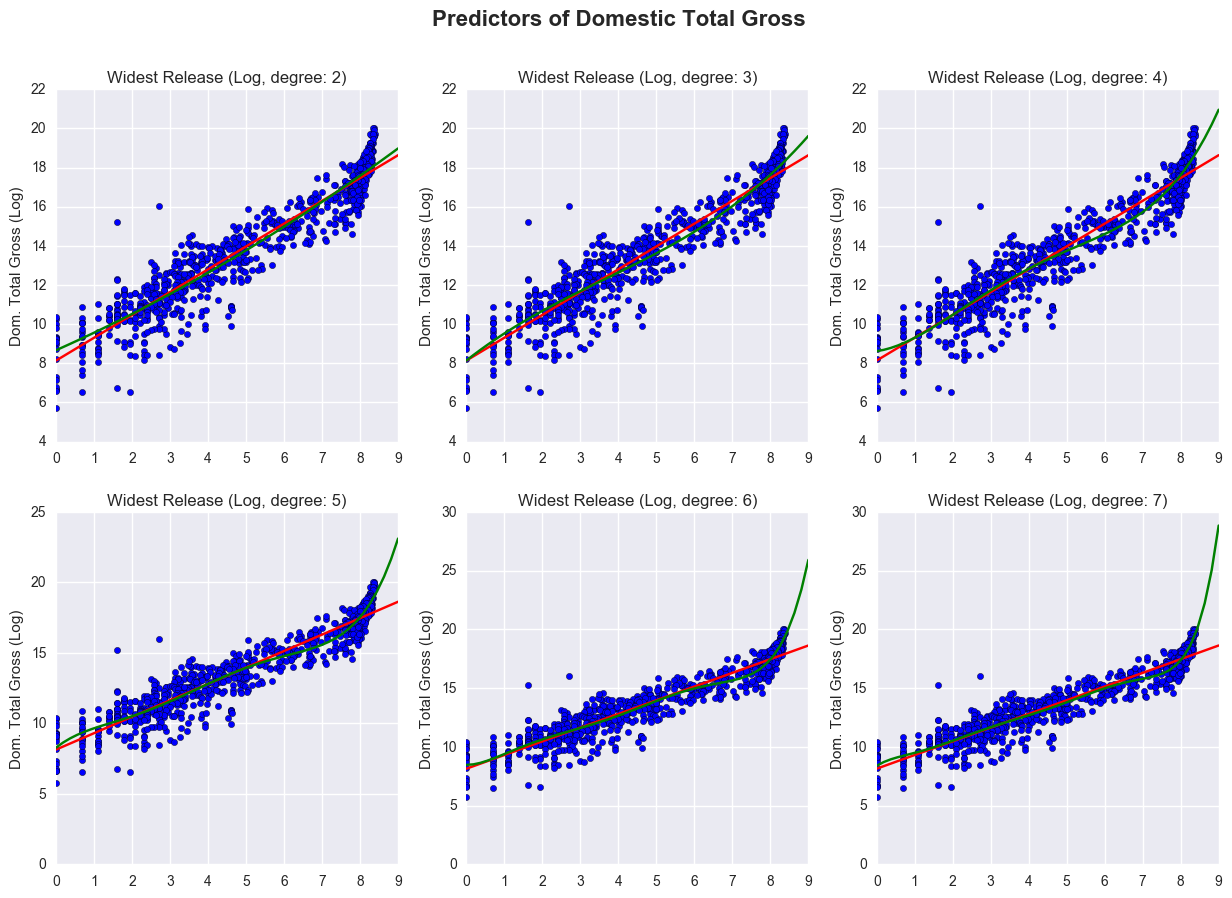

In [99]:
subplotdict = {2:231, 3:232, 4:233, 5:234, 6:235, 7:236}
for degree in range(2,8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, movies_total_df["log_dtg"])

    fig = plt.figure(num=1, figsize=(8,6))
    fig.set_size_inches(15, 10, forward=False)
    fig.suptitle('Predictors of Domestic Total Gross', fontsize=16, fontweight='bold')

    # log_widest_release
    x_plot = np.linspace(0,9, num = 50)

    plt.subplot(subplotdict[degree])
    plt.scatter(x=X, y=movies_total_df["log_dtg"], label="log_widest_release")
    plt.plot(x_plot, lwr(x_plot), color="red")
    plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='green', label="polynomial")
    plt.title('Widest Release (Log, degree: ' + str(degree) + ")")
    plt.ylabel("Dom. Total Gross (Log)")
    plt.xlim(0, 9)
    plt.grid(True)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, movies_total_df["log_dtg"], test_size=0.8)

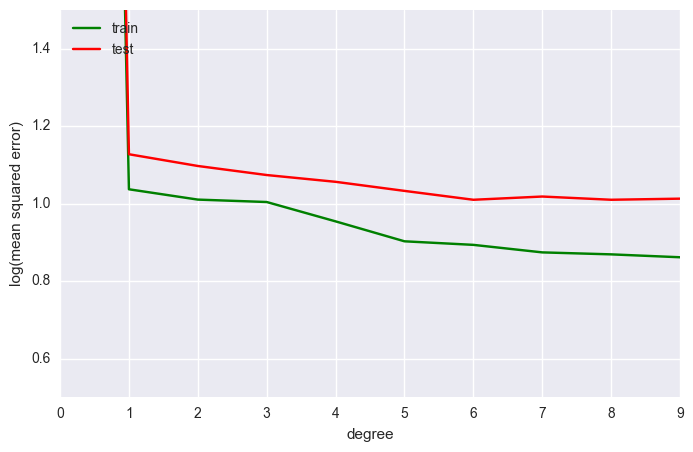

In [107]:
from sklearn.metrics import mean_squared_error

train_error = np.empty(10)
test_error = np.empty(10)

for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,5))
plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.5, 1.5))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [114]:
# Bringing in our helper functions

def f(x):
    return np.sin(2 * np.pi * x)

def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    #ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    plt.scatter(x=X, y=movies_total_df["log_dtg"], label="log_widest_release")
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((4, 22))
    ax.set_xlim((0, 9))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

x_plot = np.linspace(0, 9, 100)

/Users/maxkneissl/anaconda/lib/python3.5/site-packages/sklearn/pipeline.py:270: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/maxkneissl/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/maxkneissl/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maxkneissl/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause 

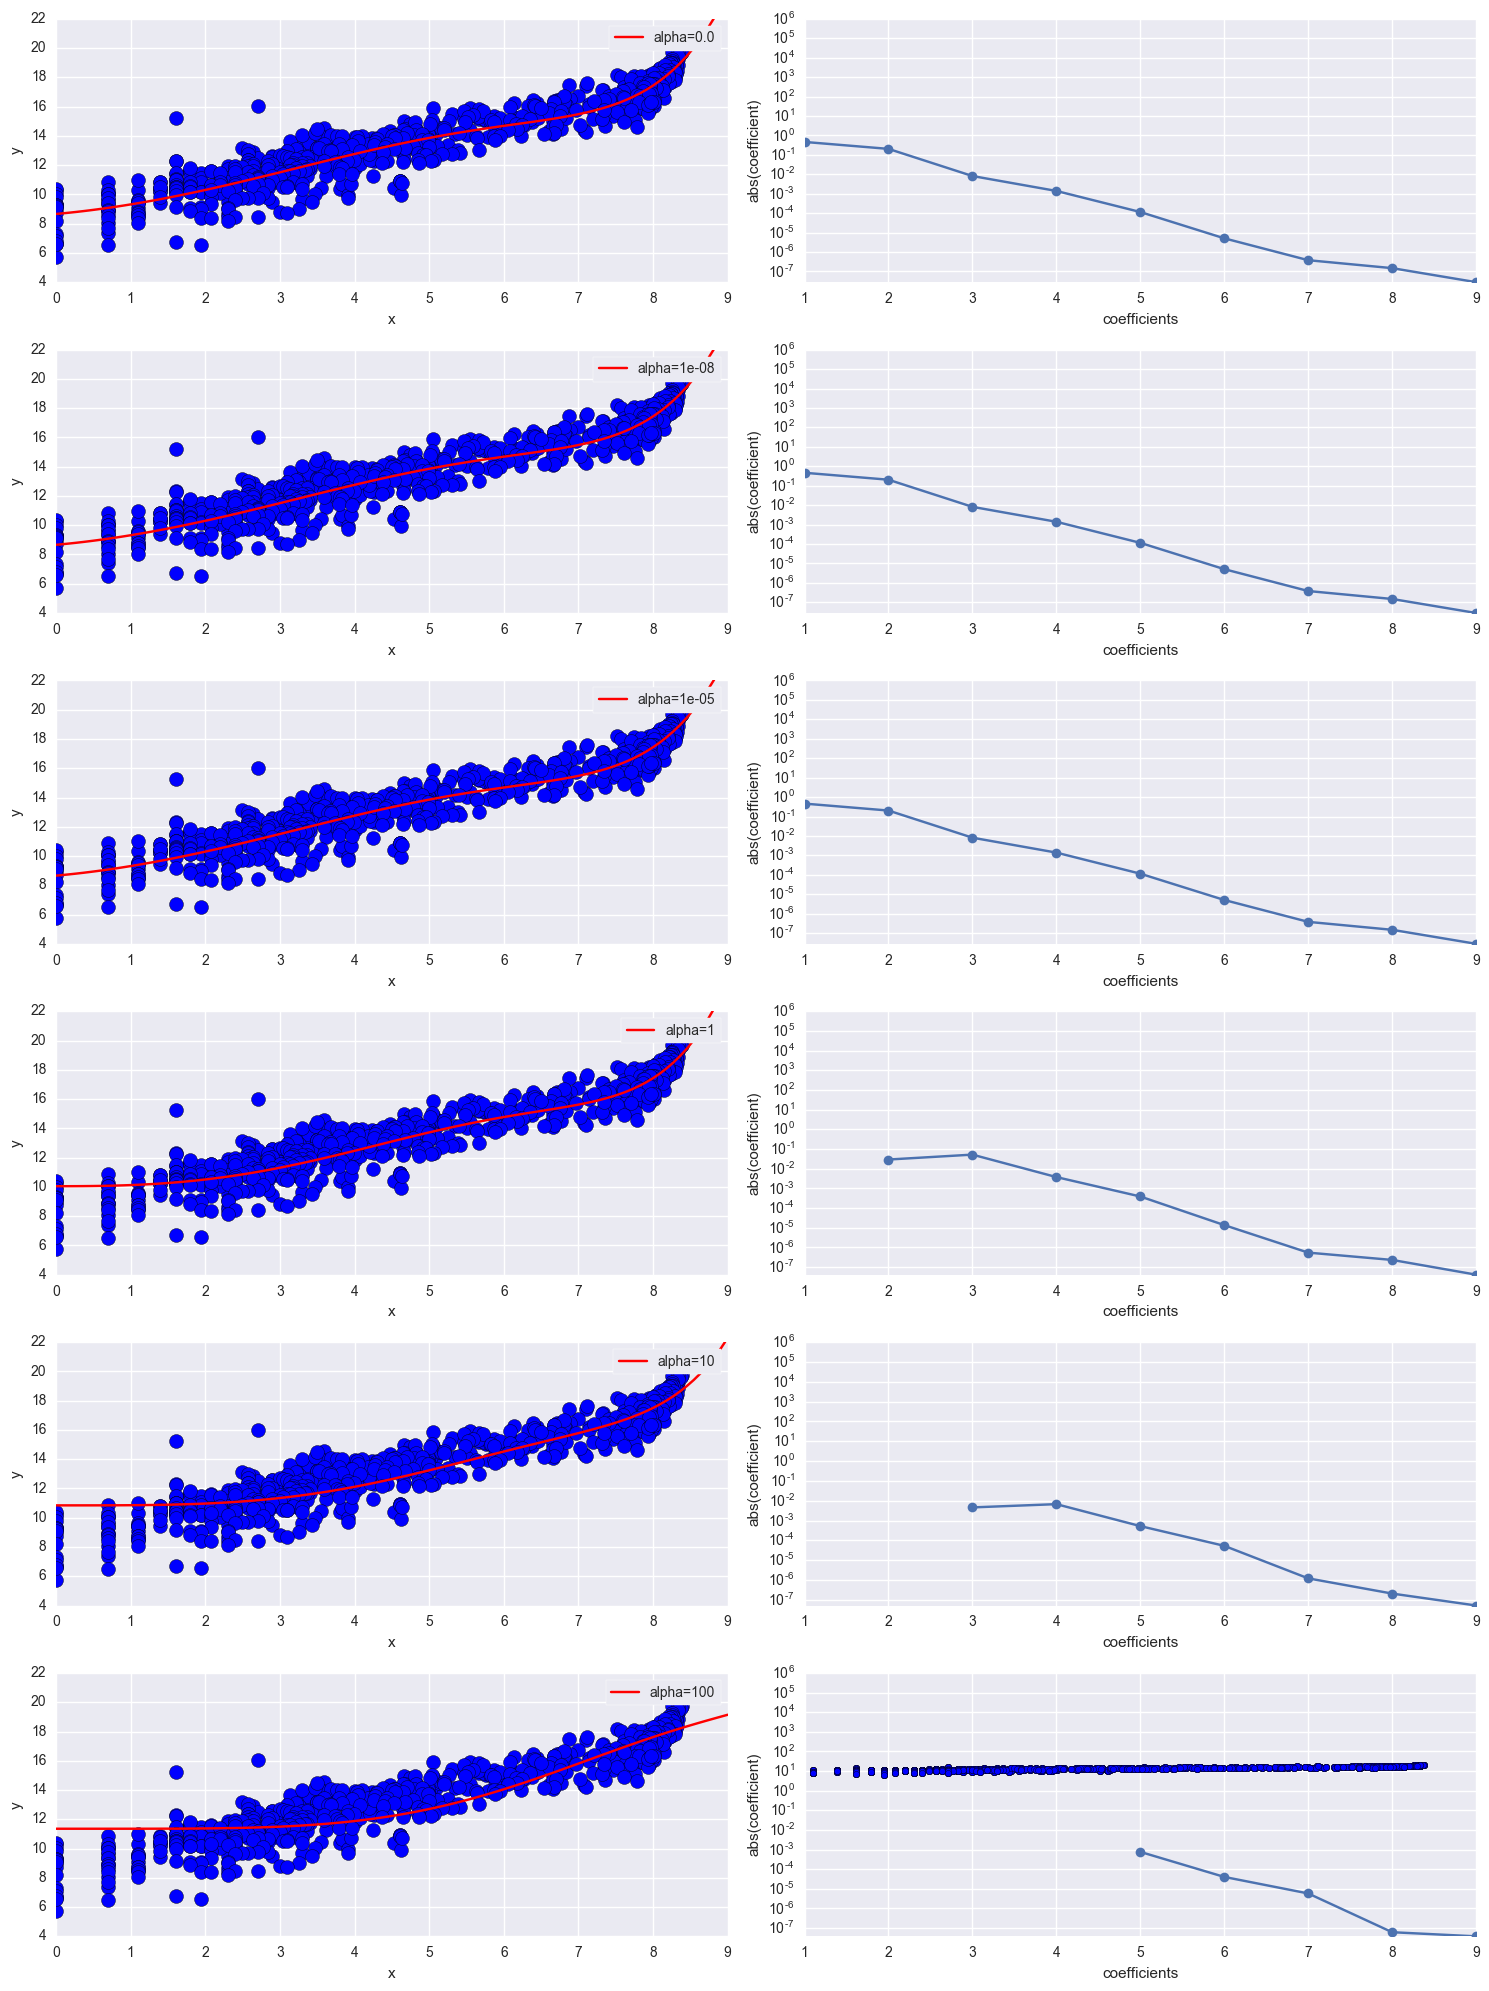

In [122]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Set up a figure and axes for 8 plots, 2 per row for 4 rows
fig, ax_rows = plt.subplots(6, 2, figsize=(15, 20))

# A helper function to plot the absolute value of the coefficients on the right-hand column plot
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))
    ax.set_ylim(-1000,1e6)

# Try out 4 different values of the RidgeRegression parameter alpha and watch how the resulting models change
# With higher values of alpha, more complex (more wiggly) models will be more punished and thus less likely
degree = 9
alphas = [0.0, 1e-8, 1e-5, 1, 10, 100]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

plt.tight_layout()

## Find which alpha reduced mean squared error

In [127]:
# first we will zero-mean (& unit variance) our features:
from sklearn import preprocessing

X_sc=preprocessing.normalize(movies_total_df["domestic_total_gross"])
# turn back in DF

X_sc=pd.DataFrame(X_sc)

# quick sanity check
print(X_sc.std(), X_sc.mean())

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
748   NaN
749   NaN
750   NaN
751   NaN
752   NaN
753   NaN
754   NaN
755   NaN
756   NaN
757   NaN
758   NaN
759   NaN
760   NaN
761   NaN
762   NaN
763   NaN
764   NaN
765   NaN
766   NaN
767   NaN
768   NaN
769   NaN
770   NaN
771   NaN
772   NaN
773   NaN
774   NaN
775   NaN
776   NaN
777   NaN
dtype: float64 0      2.258111e-01
1      2.690888e-01
2      1.888388e-01
3      2.784505e-01
4      2.014179e-01
5      2.038433e-01
6      1.828029e-01
7      1.279141e-01
8      2.009031e-01
9      1.798922e-01
10     1.279952e-01
11     1.788787e-03
12     8.601319e-02
13     7.942072e-02
14     1.293841e-01
15     2.620931e-02
16     8.988213e-02
17     3.544889e-02
18     1.323840

/Users/maxkneissl/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [136]:
y = movies_total_df["log_dtg"]
y.shape

X = movies_total_df["log_widest_release"]
X.reshape((778, 1))

array([[ 8.3490112 ],
       [ 8.36753242],
       [ 8.28374675],
       [ 8.33254894],
       [ 8.32941678],
       [ 8.38503229],
       [ 8.35608503],
       [ 8.32941678],
       [ 8.25738566],
       [ 8.35585004],
       [ 8.26410576],
       [ 4.66343909],
       [ 8.33158624],
       [ 8.29079435],
       [ 8.26230094],
       [ 8.13329386],
       [ 8.30375242],
       [ 8.29329936],
       [ 8.30127349],
       [ 8.32603269],
       [ 3.80666249],
       [ 8.18618599],
       [ 8.27690348],
       [ 8.27588567],
       [ 8.31041499],
       [ 8.08085642],
       [ 8.11850507],
       [ 8.23297179],
       [ 8.25192471],
       [ 8.31164395],
       [ 8.28273588],
       [ 8.15421269],
       [ 8.16280135],
       [ 7.9827577 ],
       [ 7.92371033],
       [ 8.15822992],
       [ 3.63758616],
       [ 8.00503334],
       [ 8.27435701],
       [ 8.129175  ],
       [ 8.07558264],
       [ 8.22684089],
       [ 8.0836372 ],
       [ 8.24328252],
       [ 8.23747929],
       [ 8

/Users/maxkneissl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/maxkneissl/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/maxkneissl/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maxkneissl/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


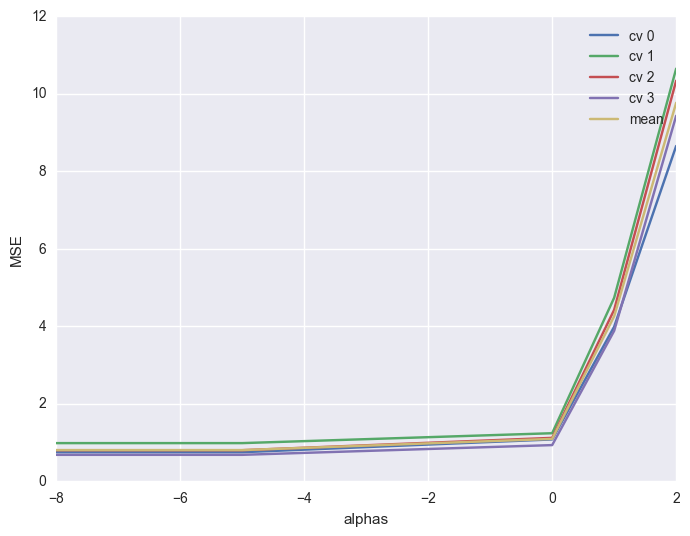

In [138]:
from sklearn.cross_validation import KFold

def pick_alpha(fold, X, y):
    kf = KFold(n=len(X), n_folds=fold, shuffle=True)
    
    all_scores=[]

    for train, test in kf:
        x_train=X.iloc[train]
        y_train=y.iloc[train]
        x_test=X.iloc[test]
        y_test=y.iloc[test]
        mse_score=[]
        for a in alphas:
            est=Lasso(alpha=a)
            est.fit(x_train,y_train)
            mse=np.mean((y_test-est.predict(x_test))**2)
            mse_score.append(mse)
        all_scores.append(mse_score)
    plt.figure(figsize=(8,6))
    plt.legend()
    for i in range(fold):
        plt.plot(np.log10(alphas), all_scores[i],label = 'cv %s'%i)
    # Calculate the mean and plot it
    mean = np.array(all_scores).mean(axis=0).tolist()
    plt.plot(np.log10(alphas), mean, label = 'mean')
    plt.legend()
    plt.xlabel('alphas')
    plt.ylabel('MSE')
    plt.ylim(0)
    plt.show()

    
    
pick_alpha(4, X=movies_total_df[["log_widest_release", "no_countries", "days_in_release"]], y=movies_total_df["log_dtg"])